<a href="https://colab.research.google.com/github/IsaacFigNewton/Analyzing-Hate-Crime-Data/blob/main/Hate_Crime_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Stuff

###Import all libraries

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

###Import datasets

In [ ]:
crime_df = pd.read_csv("https://raw.githubusercontent.com/IsaacFigNewton/Analyzing-Hate-Crime-Data/main/hate_crime/hate_crime.csv", on_bad_lines='skip')
city_demo_df = pd.read_csv("https://raw.githubusercontent.com/IsaacFigNewton/Analyzing-Hate-Crime-Data/main/demographics/city/ACSST1Y2022.S0101-Data.csv", on_bad_lines='skip')
county_demo_df = pd.read_csv("https://raw.githubusercontent.com/IsaacFigNewton/Analyzing-Hate-Crime-Data/main/demographics/county/ACSDP1Y2022.DP05-Data.csv", on_bad_lines='skip')
shared_demo_columns = pd.read_csv("https://raw.githubusercontent.com/IsaacFigNewton/Analyzing-Hate-Crime-Data/main/demographics/shared_columns.csv", on_bad_lines='skip')

#Data Cleaning

In [ ]:
# use the entries of the first row as the column headers for easier management
def fixHeaders(df):
  new_headers = df.iloc[0]
  new_df = df[1:]
  new_df.columns = new_headers
  return new_df

In [ ]:
#fix the headers
city_demo_df = fixHeaders(city_demo_df)
county_demo_df = fixHeaders(county_demo_df)

In [ ]:
def split_area_name(area):
    result = [np.nan, np.nan, np.nan]
    if ", " in area:
        result = area.split(", ") + [np.nan]
    if " city" in result[0].lower():
        result[0] = result[0][0:-5]
        result[2] = result[1]
        result[1] = "City"
    elif " county" in result[0].lower():
        result[0] = result[0][0:-7]
        result[2] = result[1]
        result[1] = "County"

    return result + [np.nan] * (3 - len(result))

def splitArea(df):
    df[["pug_agency_name", "agency_type_name", "state_name"]] = df["Geographic Area Name"].map(split_area_name).apply(pd.Series)

In [ ]:
splitArea(city_demo_df)
splitArea(county_demo_df)

city_demo_df.head()

,Geography,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under 5 years,Margin of Error!!Total!!Total population!!AGE!!Under 5 years,Estimate!!Total!!Total population!!AGE!!5 to 9 years,Margin of Error!!Total!!Total population!!AGE!!5 to 9 years,Estimate!!Total!!Total population!!AGE!!10 to 14 years,Margin of Error!!Total!!Total population!!AGE!!10 to 14 years,...,Estimate!!Percent Female!!Total population!!SUMMARY INDICATORS!!Child dependency ratio,Margin of Error!!Percent Female!!Total population!!SUMMARY INDICATORS!!Child dependency ratio,Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex,Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex,Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age,NaN,pug_agency_name,agency_type_name,state_name
1,1600000US0103076,"Auburn city, Alabama",80009,20,3657,1311,3809,1134,4348,1136,...,(X),(X),(X),(X),(X),(X),NaN,Auburn,City,Alabama
2,1600000US0107000,"Birmingham city, Alabama",196353,868,11495,2020,11631,2173,9404,2476,...,(X),(X),(X),(X),(X),(X),NaN,Birmingham,City,Alabama
3,1600000US0121184,"Dothan city, Alabama",70524,678,4549,468,5059,662,4146,592,...,(X),(X),(X),(X),(X),(X),NaN,Dothan,City,Alabama
4,1600000US0135896,"Hoover city, Alabama",92427,45,5778,1406,5805,1516,7377,2051,...,(X),(X),(X),(X),(X),(X),NaN,Hoover,City,Alabama
5,1600000US0137000,"Huntsville city, Alabama",222363,2301,12180,1698,13883,1837,10494,1917,...,(X),(X),(X),(X),(X),(X),NaN,Huntsville,City,Alabama


In [ ]:
#only consider 2022 crime data from cities and counties
crime_df = crime_df[(crime_df['data_year'] == 2022) & ((crime_df['agency_type_name'] == "City") | (crime_df['agency_type_name'] == "County"))]

In [51]:
county_demo_df.columns = county_demo_df.columns.str.replace('SEX AND AGE', 'Total')
county_demo_df.reindex(county_demo_df.columns.sort(), axis=1)
county_demo_df

,Geography,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!Male,Margin of Error!!Total!!Total population!!Male,Estimate!!Total!!Total population!!Female,Margin of Error!!Total!!Total population!!Female,Estimate!!Total!!Total population!!Sex ratio (males per 100 females),Margin of Error!!Total!!Total population!!Sex ratio (males per 100 females),...,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",NaN,pug_agency_name,agency_type_name,state_name
0,0500000US01003,"Baldwin County, Alabama",246435,*****,120664,1277,125771,1277,95.9,2.0,...,189876,(X),48.1,0.4,51.9,0.4,NaN,Baldwin,County,Alabama
1,0500000US01015,"Calhoun County, Alabama",115788,*****,56554,791,59234,791,95.5,2.6,...,90642,(X),47.8,0.3,52.2,0.3,NaN,Calhoun,County,Alabama
2,0500000US01043,"Cullman County, Alabama",90665,*****,45051,622,45614,622,98.8,2.7,...,69096,(X),49.0,0.6,51.0,0.6,NaN,Cullman,County,Alabama
3,0500000US01049,"DeKalb County, Alabama",71998,*****,36024,566,35974,566,100.1,3.2,...,52110,(X),49.6,0.9,50.4,0.9,NaN,DeKalb,County,Alabama
4,0500000US01051,"Elmore County, Alabama",89563,*****,43448,541,46115,541,94.2,2.3,...,69952,(X),47.8,0.5,52.2,0.5,NaN,Elmore,County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0500000US72113,"Ponce Municipio, Puerto Rico",132138,*****,62755,*****,69383,*****,90.4,*****,...,108813,(X),46.9,0.2,53.1,0.2,NaN,Ponce Municipio,Puerto Rico,NaN
844,0500000US72127,"San Juan Municipio, Puerto Rico",334776,*****,152697,*****,182079,*****,83.9,*****,...,267707,(X),44.4,0.4,55.6,0.4,NaN,San Juan Municipio,Puerto Rico,NaN
845,0500000US72135,"Toa Alta Municipio, Puerto Rico",66041,*****,30992,507,35049,507,88.4,2.7,...,54929,(X),47.0,0.2,53.0,0.2,NaN,Toa Alta Municipio,Puerto Rico,NaN
846,0500000US72137,"Toa Baja Municipio, Puerto Rico",72783,*****,34120,462,38663,462,88.2,2.3,...,59675,(X),44.9,0.7,55.1,0.7,NaN,Toa Baja Municipio,Puerto Rico,NaN


###Combine the datasets

In [69]:
# Create new columns that combine data shared between all the city and county entries
overlapping_columns = set(city_demo_df.columns).intersection(set(county_demo_df.columns))
demo_df = pd.concat([city_demo_df[list(overlapping_columns)],county_demo_df[list(overlapping_columns)]])

In [70]:
merged_df = pd.merge(crime_df, demo_df, on=["pug_agency_name", "agency_type_name", "state_name"])

In [72]:
merged_df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
230020,1476719,2022,AK0010500,Kodiak,NaN,City,AK,Alaska,Pacific,West,...,American Indian or Alaska Native,Not Specified,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S
230021,1483026,2022,AK0015600,Wasilla,NaN,City,AK,Alaska,Pacific,West,...,Not Specified,Not Specified,1,Destruction/Damage/Vandalism of Property,0.0,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,S,S
230022,1484192,2022,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Intimidation,1.0,Community Center,Anti-Jewish,Individual,S,S
230023,1484193,2022,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,S,S
230024,1484194,2022,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,NaN,Church/Synagogue/Temple/Mosque,Anti-Jewish,Business,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241656,1472040,2022,WY0150000,Park,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,2,Theft From Building,2.0,Residence/Home,Anti-White,Individual,S,S
241658,1473449,2022,WY0190200,Rock Springs,NaN,City,WY,Wyoming,Mountain,West,...,White,Hispanic or Latino,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,NaN,County,WY,Wyoming,Mountain,West,...,White,Multiple,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


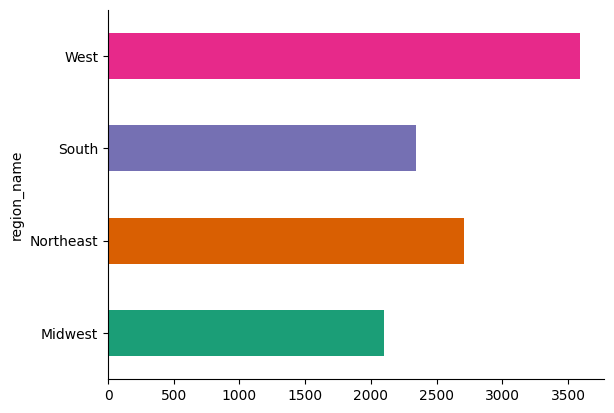

In [73]:
merged_df.groupby('region_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

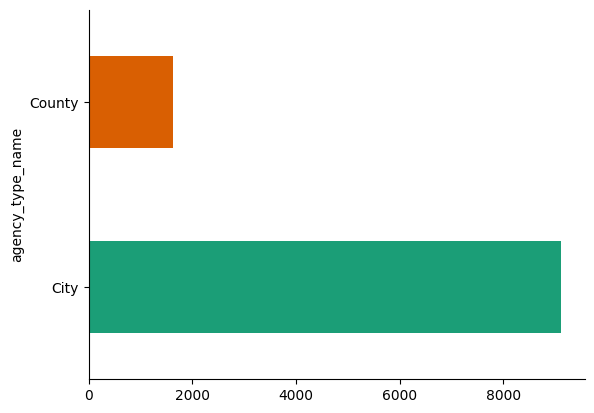

In [74]:
merged_df.groupby('agency_type_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

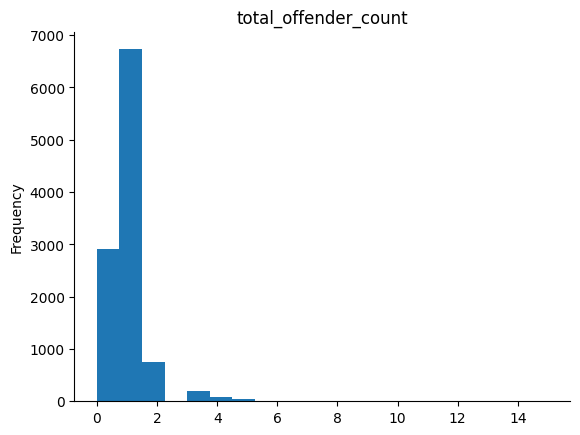

In [75]:
merged_df['total_offender_count'].plot(kind='hist', bins=20, title='total_offender_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

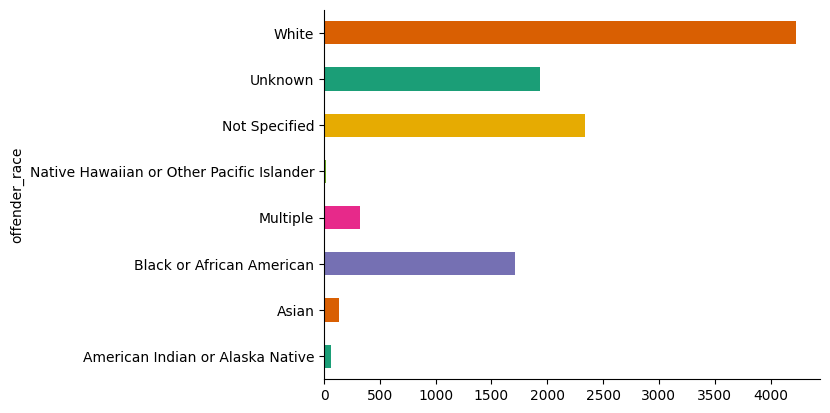

In [76]:
merged_df.groupby('offender_race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

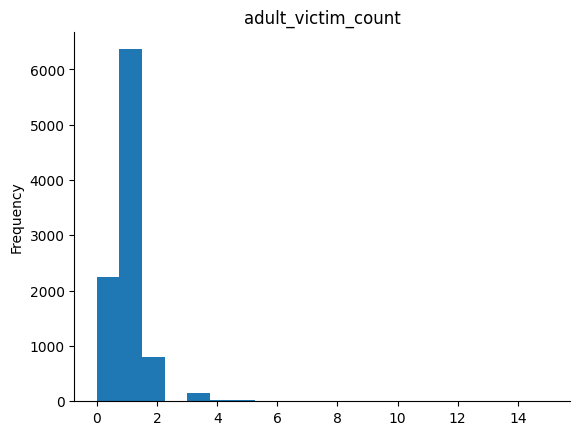

In [77]:
merged_df['adult_victim_count'].plot(kind='hist', bins=20, title='adult_victim_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

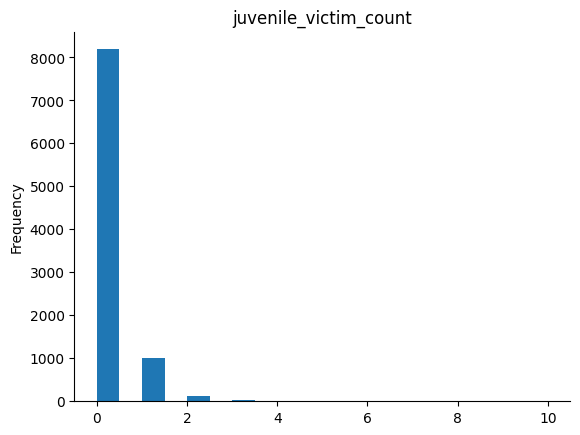

In [78]:
merged_df['juvenile_victim_count'].plot(kind='hist', bins=20, title='juvenile_victim_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

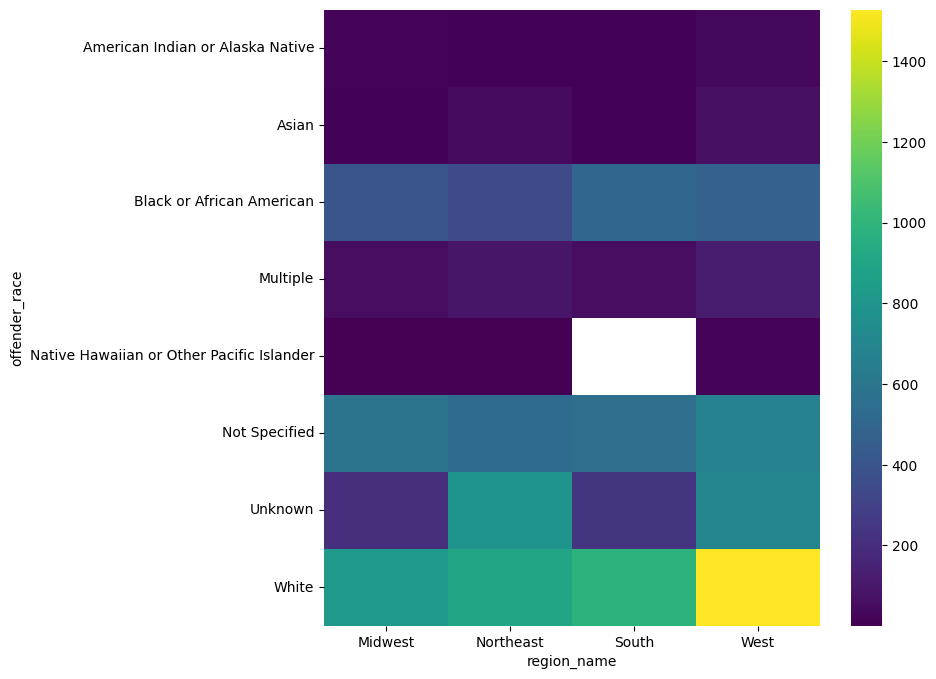

In [79]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['offender_race'].value_counts()
    for x_label, grp in merged_df.groupby('region_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('region_name')
_ = plt.ylabel('offender_race')